In [3]:
import numpy 
import math
from matplotlib import pyplot
%matplotlib inline

In [57]:
N=200
x_start, x_end=-4.0,4.0
y_start, y_end=-2.0,2.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
X, Y=numpy.meshgrid(x,y)

In [58]:
u_inf=1.0
u_freestream=u_inf * numpy.ones((N,N),dtype=float) #what is .ones? and what is dtype=float?
v_freestream=numpy.zeros((N,N),dtype=float)
psi_freestream = u_inf * Y

In [59]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)

    return u, v

In [60]:
def get_stream_function(strength,xs,ys,X,Y):
    psi=strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs)) #why there is 2 after arctan?
    return psi

In [88]:
strength_source=7.0
x_source,y_source=-1.0,0.0


u_source,v_source = get_velocity(strength_source, x_source, y_source, X,Y)
psi_source=get_stream_function(strength_source, x_source, y_source, X, Y)

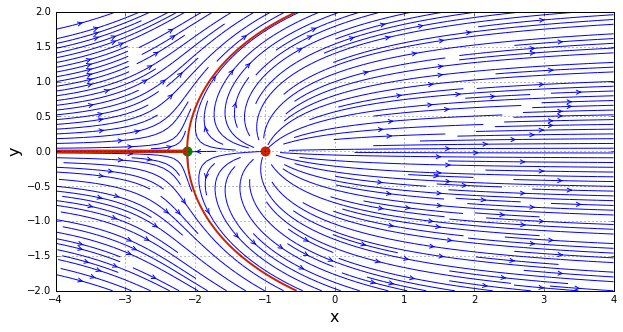

In [89]:
u=u_freestream+u_source
v=v_freestream+v_source
psi = psi_freestream + psi_source


size=10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True) # what it is?
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source


pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')


pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');



# challenge 1

In [22]:
?pyplot.grid

In [29]:
?numpy.ones((N,N),dtype=float) 

In [30]:
?numpy.zeros((N,N),dtype=float)

In [102]:
strength_sink = -3.0        
x_sink, y_sink = 1.0, 0.0   

strength_sink2 = -2.0        
x_sink2, y_sink2 = 2.0, 0.0   

strength_sink3 = -2.0        
x_sink3, y_sink3 = 3.0, 0.0

#strength_sink4 = -2.0        
#x_sink4, y_sink4 = 2.0, 1.0


u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

u_sink2, v_sink2 = get_velocity(strength_sink2, x_sink2, y_sink2, X, Y)
psi_sink2 = get_stream_function(strength_sink2, x_sink2, y_sink2, X, Y)

u_sink3, v_sink3 = get_velocity(strength_sink3, x_sink3, y_sink3, X, Y)
psi_sink3 = get_stream_function(strength_sink3, x_sink3, y_sink3, X, Y)

##psi_sink4 = get_stream_function(strength_sink4, x_sink4, y_sink4, X, Y)

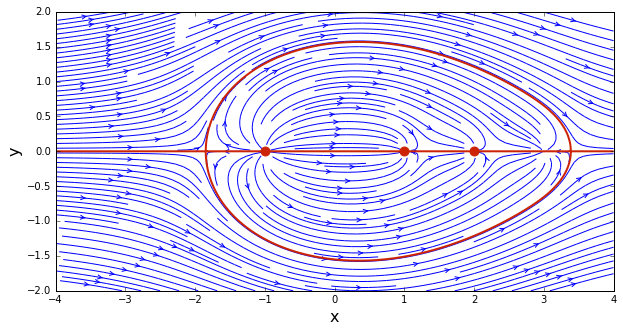

In [103]:
u = u_freestream + u_source + u_sink+u_sink2+u_sink3
v = v_freestream + v_source + v_sink+v_sink2+v_sink3
psi = psi_freestream + psi_source + psi_sink+psi_sink2+psi_sink3


size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink, x_sink2], [y_source, y_sink, y_sink2], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

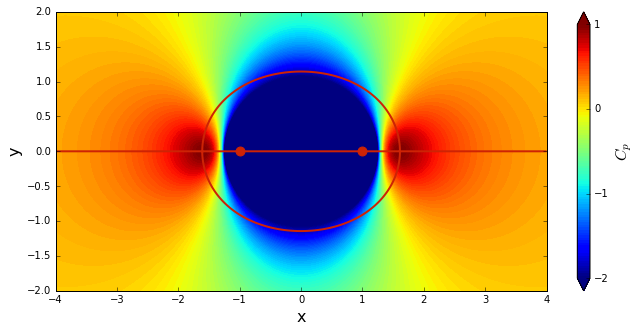

In [46]:
cp = 1.0 - (u**2+v**2)/u_inf**2


size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');